In [90]:
! pip install qeds
import pandas as pd
%matplotlib inline
import qeds
qeds.themes.mpl_style();

# Basic Functionality - Exercises


**For these exercises we use unemployment data by state at a monthly frequency.**

- **We download the data directly from a url and read it into a pandas DataFrame.**

- **Since we want to look at the unemployment rate across different states over time, we proceed to a transformation of the data similar to an Excel pivot-table.**

In [91]:
#Download the data directly from a url and read it into a pandas DataFrame.
url = "https://datascience.quantecon.org/assets/data/state_unemployment.csv"
unemp_raw = pd.read_csv(url, parse_dates=["Date"])

In [92]:
#Transformation of the data similar to an Excel pivot-table
unemp_all = (
    unemp_raw
    .reset_index()
    .pivot_table(index="Date", columns="state", values="UnemploymentRate")
)
unemp_all.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,4.7,6.3,4.1,4.4,5.0,2.8,2.8,3.5,3.7,3.7,...,2.4,3.7,4.6,3.1,2.7,2.6,4.9,5.8,3.2,4.1
2000-02-01,4.7,6.3,4.1,4.3,5.0,2.8,2.7,3.6,3.7,3.6,...,2.4,3.7,4.6,3.1,2.6,2.5,4.9,5.6,3.2,3.9
2000-03-01,4.6,6.3,4.0,4.3,5.0,2.7,2.6,3.6,3.7,3.6,...,2.4,3.8,4.5,3.1,2.6,2.4,5.0,5.5,3.3,3.9
2000-04-01,4.6,6.3,4.0,4.3,5.1,2.7,2.5,3.7,3.7,3.7,...,2.4,3.8,4.4,3.1,2.7,2.4,5.0,5.4,3.4,3.8
2000-05-01,4.5,6.3,4.0,4.2,5.1,2.7,2.4,3.7,3.7,3.7,...,2.4,3.9,4.3,3.2,2.7,2.3,5.1,5.4,3.5,3.8


In [93]:
#subset of the columns 
states = [
    "Arizona", "California", "Florida", "Illinois",
    "Michigan", "New York", "Texas"
]
unemp = unemp_all[states]
unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


## Exercise 1

**Looking at the unemp DataFrame above, can you identify the index? The columns? You can use the cell below to verify your visual intuition.**

In [94]:
#index
unemp.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=216, freq=None)

In [95]:
#columns
unemp.columns

Index(['Arizona', 'California', 'Florida', 'Illinois', 'Michigan', 'New York',
       'Texas'],
      dtype='object', name='state')

## Exercise 2

**Do the following exercises in separate code cells below:**

1. **At each date, what is the minimum unemployment rate across all states in our sample?**

In [96]:
# min unemployment rate by state
unemp.min()

#alternatively, we can use unemp.agg(min)

state
Arizona       3.6
California    4.5
Florida       3.1
Illinois      4.2
Michigan      3.2
New York      4.2
Texas         3.9
dtype: float64

In [97]:
# The argument axis=1 allows to search within rows. This gives the min overall for a given date
unemp.min(axis=1)

Date
2000-01-01    3.3
2000-02-01    3.2
2000-03-01    3.2
2000-04-01    3.3
2000-05-01    3.5
             ... 
2017-08-01    4.0
2017-09-01    3.9
2017-10-01    3.9
2017-11-01    3.9
2017-12-01    3.9
Length: 216, dtype: float64

2. **What was the median unemployment rate in each state?**

In [98]:
# median unemployment rate by state
unemp.median()

state
Arizona       5.80
California    6.50
Florida       5.35
Illinois      6.15
Michigan      7.00
New York      5.70
Texas         5.40
dtype: float64

3. **What was the maximum unemployment rate across the states in our sample? What state did it happen in? In what month/year was this achieved?**
        Hint 1: What Python type (not dtype) is returned by the aggregation?
        Hint 2: Read documentation for the method idxmax

In [99]:
# max unemployment rate across all states and Year
unemp.max().max()

14.6

In [100]:
#type(unemp)
unemp.max().idxmax()

#if we use unemp.max() we get the max value across all states
#but we want to know more: 
    #we want the state that had the max of all max unemployment rates and the month/year in which it has been achieved

'Michigan'

In [101]:
unemp.max(axis=1).idxmax() 

#we can check whether for this date Michigan registered indeed the highest value by doing unemp.loc["06/01/2009",:]
#we will get True

Timestamp('2009-06-01 00:00:00')

4. **Classify each state as high or low volatility based on whether the variance of their unemployment is above or below 4.**


In [102]:
# high or low volatility

# 1. we create our aggregation function

def high_or_low_vol(v):
    if v.var() > 4:
        out = "High"
    else:
        out = "Low"
        
    return out

# 2. we apply the function via the agg method

unemp.agg(high_or_low_vol)

state
Arizona       High
California    High
Florida       High
Illinois       Low
Michigan      High
New York       Low
Texas          Low
dtype: object

## Exercise 3

**Imagine that we want to determine whether unemployment was high (> 6.5),medium (4.5 < x <= 6.5), or low (<= 4.5) for each state and each month.**

1. **Write a Python function that takes a single number as an input and outputs a single string noting if that number is high, medium, or low.** 

In [103]:
# Part 1: Write a Python function to classify unemployment levels.

def unemployment_levels(ul):
    if ul > 6.5:
        return "high"
    elif 4.5 < ul <= 6.5:
    #elif ul < 6.5: #equivalent to the line above
        return "medium"
    else:
        return "low"
    
    return ul

2. **Pass your function to `applymap` (quiz: why `applymap` and not `agg` or `apply`?) and save the result in a new DataFrame called `unemp_bins`.**  

In [104]:
# Part 2: Pass your function from part 1 to applymap
#Apply map allows to apply a function that takes a scalar and returns a scalar to a dataframe

unemp_bins = unemp.applymap(unemployment_levels) #replace this comment with your code!!
unemp_bins.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,low,medium,low,low,low,medium,medium
2000-02-01,low,medium,low,low,low,medium,medium
2000-03-01,low,medium,low,low,low,medium,low
2000-04-01,low,medium,low,low,low,medium,low
2000-05-01,low,medium,low,low,low,medium,low


   3. **(Challenging) Use another transform on `unemp_bins` to count how many times each state had each of the three classifications.**
    - Hint 1: Will this value counting function be a Series or scalar transform?  
    - Hint 2: Try googling "pandas count unique value" or something similar to find the right transform.  
 

In [105]:
# Part 3: Count the number of times each state had each classification.

# we count the number of times each state had each classification. 
def count_bins(cb):
    var = cb.value_counts()   
    return var

unemp_count = unemp_bins.apply(count_bins)
unemp_count

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
high,75,106,68,91,142,65,51
low,44,4,69,19,17,22,58
medium,97,106,79,106,57,129,107


In [106]:
# alternative solution: value_counts is a series function (columns) so I loop over columns to have the frequencies for each states, then append each series
unemp_freq_cat = pd.DataFrame()
for iter in unemp_bins.columns:
    series=unemp_bins[iter].value_counts()
    unemp_freq_cat=unemp_freq_cat.append(series)
unemp_freq_cat=unemp_freq_cat[['low', 'medium', 'high']]
# We can transpose the table to make it more readable, matter of preferences
unemp_freq_catT=unemp_freq_cat.T
unemp_freq_catT

,Arizona,California,Florida,Illinois,Michigan,New York,Texas
low,44.0,4.0,69.0,19.0,17.0,22.0,58.0
medium,97.0,106.0,79.0,106.0,57.0,129.0,107.0
high,75.0,106.0,68.0,91.0,142.0,65.0,51.0


4. **Construct a horizontal bar chart of the number of occurrences of each level with one bar per state and classification (21 total bars).** 

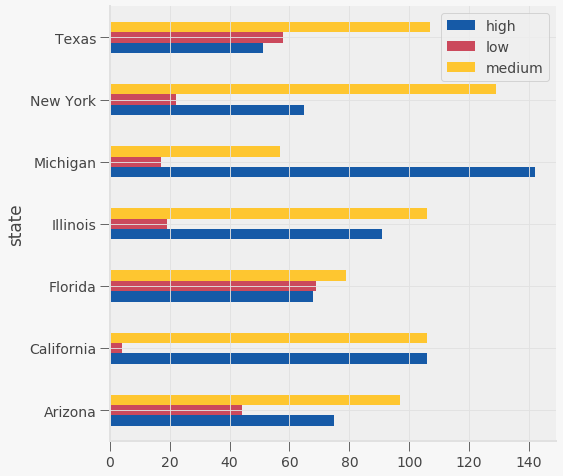

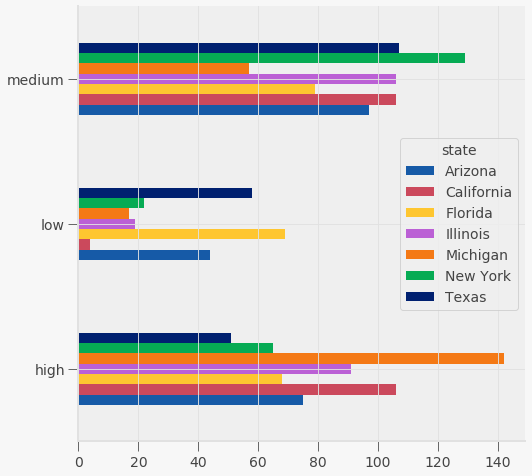

In [107]:
## then make a horizontal bar chart here
unemp_count.T.plot.barh(figsize=(8,8))
unemp_count.plot.barh(figsize=(8,8))

5. **(Challenging) Repeat the previous step, but count how many states had each classification in each month. Which month had the most states with high unemployment? What about medium and low?**  

In [108]:
# Part 4: Apply the same transform from part 4, but to each date instead of to each state.

#a solution based on this lecture has not been found :p
#alternative solution: we transpose the previous table in order to be able to apply the same function as before 
    #for more informtion on reshaping the DataFrames, check Lecture 6
unemp_binsT = unemp_bins.T
unemp_binsT

#we call the function previously created for the transposed DataFrame
unemp_countT = unemp_binsT.apply(count_bins)
unemp_countT.T.head()

#we create a for loop to answer the question
times = ["high", "medium", "low"]

for x in times:
    m=unemp_countT.T[x].idxmax()
    
    print(f"The month with {x} unemployment is {m}.")

The month with high unemployment is 2009-04-01 00:00:00.
The month with medium unemployment is 2001-09-01 00:00:00.
The month with low unemployment is 2000-08-01 00:00:00.


## Exercise 4

1. **For a single state of your choice, determine what the mean unemployment is during "Low", "Medium", and "High" unemployment times (recall your `unemp_bins` DataFrame from the exercise above).**
    - Think about how you would do this for all the states in our sample and write your thoughts... We will soon learn tools that will *greatly* simplify operations like this that operate on distinct *groups* of data at a time.  

In [109]:
#The analysis is performed on Arizona

times = ["high", "medium", "low"]

for x in times:
    Arizona_x  = unemp["Arizona"].loc[unemp_bins["Arizona"]==x].mean()

    print(f"During {x} unemployment times, the mean unemployment in Arizona is {Arizona_x}.")

During high unemployment times, the mean unemployment in Arizona is 8.73333333333333.
During medium unemployment times, the mean unemployment in Arizona is 5.436082474226807.
During low unemployment times, the mean unemployment in Arizona is 4.0636363636363635.


In [110]:
#Alternative solution:

# I chose Arizona. I extract both values and bin series, rename them and concatenate it into an new data frame.
Arizona_bins=pd.Series(unemp_bins['Arizona'], name='Arizona_Bins')
Arizona_val=pd.Series(unemp['Arizona'], name='Arizona_Values')
Arizona_valbins = pd.concat([Arizona_bins, Arizona_val], axis=1)
Arizona_valbins.head()
Arizona_valbins.groupby('Arizona_Bins')['Arizona_Values'].mean()

Arizona_Bins
high      8.733333
low       4.063636
medium    5.436082
Name: Arizona_Values, dtype: float64

In [111]:
#Now, we perform the same analysis on all countries

states = ["Arizona", "California", "Florida", "Illinois",
          "Michigan", "New York", "Texas"]

for y in states:
    for x in times:
        y_x  = unemp[y].loc[unemp_bins[y]==x].mean()

        print(f"{y} - {x}: {y_x}.")

Arizona - high: 8.73333333333333.
Arizona - medium: 5.436082474226807.
Arizona - low: 4.0636363636363635.
California - high: 9.249056603773582.
California - medium: 5.454716981132074.
California - low: 4.5.
Florida - high: 9.155882352941177.
Florida - medium: 5.331645569620254.
Florida - low: 3.807246376811594.
Illinois - high: 8.740659340659343.
Illinois - medium: 5.618867924528302.
Illinois - low: 4.35263157894737.
Michigan - high: 8.76267605633803.
Michigan - medium: 5.4070175438596495.
Michigan - low: 3.8764705882352946.
New York - high: 8.16923076923077.
New York - medium: 5.3612403100775206.
New York - low: 4.340909090909091.
Texas - high: 7.552941176470585.
Texas - medium: 5.567289719626171.
Texas - low: 4.298275862068967.


2. **Which states in our sample performs the best during "bad times?" To determine this, compute the mean unemployment for each state only for months in which the mean unemployment rate in our sample is greater than 7.**  

In [112]:
# Between bracket, the condition that the value is greater than 7
df=unemp[unemp>7].mean()
df=df.loc[df==min(df)]
df
# There must be a way to be more concise

state
Texas    7.972727
dtype: float64

In [113]:
#Alternative solution
def unemployment_levels2(ul2):
    if ul2 > 7:
        return "High"
    else:
        return "Low"
    
    return ul2

unemp_bins2 = unemp.applymap(unemployment_levels2)

for s in states:
    s_high  = unemp[s].loc[unemp_bins2[s]=="High"].mean()
     
    print(f"{s}: {s_high}")
    
#The 3 states that perform the best during high unemployment times (>7) are, in ascending order, Texas, New York, Arizona

Arizona: 9.038461538461535
California: 10.234210526315788
Florida: 9.568965517241377
Illinois: 9.423529411764704
Michigan: 9.465384615384618
New York: 8.286666666666667
Texas: 7.972727272727272
